In [3]:
pip install requests beautifulsoup4 pandas

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
url = "https://en.wikipedia.org/wiki/The_New_York_Times%27_100_Best_Books_of_the_21st_Century"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36'
}

def scrape_nyt_books_full():
    print("Memulai scraping daftar buku...")
    
    try:
        # 1. Request halaman
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        
        # 2. Parse HTML
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # 3. Cari tabel data
        table = soup.find('table', {'class': 'wikitable'})
        if not table:
            raise ValueError("Error: Tabel tidak ditemukan. Struktur HTML mungkin berubah!")
        
        # 4. Ekstrak semua kolom
        books = []
        rows = table.find_all('tr')[1:]  # Skip header
        
        for row in rows:
            cols = row.find_all('td')
            if len(cols) >= 7:  # Pastikan ada minimal 7 kolom
                title = cols[0].get_text(strip=True)
                author = cols[1].get_text(strip=True)
                publisher = cols[2].get_text(strip=True) if len(cols) > 2 else "N/A"
                date = cols[3].get_text(strip=True) if len(cols) > 3 else "N/A"
                genre = cols[4].get_text(strip=True) if len(cols) > 4 else "N/A"
                length = cols[5].get_text(strip=True) if len(cols) > 5 else "N/A"
                isbn = cols[6].get_text(strip=True) if len(cols) > 6 else "N/A"
                
                books.append({
                    'Title': title,
                    'Author': author,
                    'Publisher': publisher,
                    'Date': date,
                    'Genre': genre,
                    'Length': length,
                    'ISBN': isbn
                })
        
        # 5. Convert ke DataFrame dan simpan CSV
        df = pd.DataFrame(books)
        df.to_csv('TheNewYorkTimes100BestBooks.csv', index=False, encoding='utf-8')
        print("Data berhasil disimpan ke TheNewYorkTimes100BestBooks.csv")
        print("\n5 Buku Teratas:")
        print(df.head())
        
    except Exception as e:
        print(f"❌ Error: {e}")

if __name__ == "__main__":
    scrape_nyt_books_full()

Memulai scraping daftar buku...
Data berhasil disimpan ke TheNewYorkTimes100BestBooks.csv

5 Buku Teratas:
                      Title            Author                  Publisher  \
0       My Brilliant Friend    Elena Ferrante            Europa Editions   
1  The Warmth of Other Suns  Isabel Wilkerson               Random House   
2                 Wolf Hall     Hilary Mantel              Fourth Estate   
3           The Known World   Edward P. Jones              Amistad Press   
4           The Corrections  Jonathan Franzen  Farrar, Straus and Giroux   

   Date               Genre  Length           ISBN  
0  2011             Fiction  336 pp  9781609450786  
1  2010             History  640 pp  9780679444329  
2  2009  Historical fiction  653 pp  9780007230204  
3  2003             Fiction  432 pp  9780060557546  
4  2001             Fiction  568 pp  9780374100124  


In [3]:
df = pd.read_csv('TheNewYorkTimes100BestBooks.csv')
df.head(50)

,Title,Author,Publisher,Date,Genre,Length,ISBN
0,My Brilliant Friend,Elena Ferrante,Europa Editions,2011,Fiction,336 pp,9781609450786
1,The Warmth of Other Suns,Isabel Wilkerson,Random House,2010,History,640 pp,9780679444329
2,Wolf Hall,Hilary Mantel,Fourth Estate,2009,Historical fiction,653 pp,9780007230204
3,The Known World,Edward P. Jones,Amistad Press,2003,Fiction,432 pp,9780060557546
4,The Corrections,Jonathan Franzen,"Farrar, Straus and Giroux",2001,Fiction,568 pp,9780374100124
5,2666,Roberto Bolaño,"Farrar, Straus and Giroux",2004,Fiction,912 pp,9780374100148
6,The Underground Railroad,Colson Whitehead,Doubleday,2016,Fiction,320 pp,9780385542364
7,Austerlitz,W. G. Sebald,Hamish Hamilton,2001,Fiction,416 pp,9780241141250
8,Never Let Me Go,Kazuo Ishiguro,Faber & Faber,2005,Dystopian fiction,288 pp,9780571224135
9,Gilead,Marilynne Robinson,"Farrar, Straus and Giroux",2004,Fiction,256 pp,9780374153892


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      100 non-null    object
 1   Author     100 non-null    object
 2   Publisher  100 non-null    object
 3   Date       100 non-null    object
 4   Genre      100 non-null    object
 5   Length     100 non-null    object
 6   ISBN       100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [48]:
df.isnull()

,Title,Author,Publisher,Date,Genre,Length,ISBN
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False


In [50]:
df.isnull().any()

Title        False
Author       False
Publisher    False
Date         False
Genre        False
Length       False
ISBN         False
dtype: bool

In [7]:
df.isnull().sum()

Title        0
Author       0
Publisher    0
Date         0
Genre        0
Length       0
ISBN         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum().sum()

0

In [5]:
df['Author'] = df['Author'].str.strip()
df['Title'] = df['Title'].str.strip()

In [6]:
df.drop('ISBN', axis=1, inplace=True)
df.head(20)

,Title,Author,Publisher,Date,Genre,Length
0,My Brilliant Friend,Elena Ferrante,Europa Editions,2011,Fiction,336 pp
1,The Warmth of Other Suns,Isabel Wilkerson,Random House,2010,History,640 pp
2,Wolf Hall,Hilary Mantel,Fourth Estate,2009,Historical fiction,653 pp
3,The Known World,Edward P. Jones,Amistad Press,2003,Fiction,432 pp
4,The Corrections,Jonathan Franzen,"Farrar, Straus and Giroux",2001,Fiction,568 pp
5,2666,Roberto Bolaño,"Farrar, Straus and Giroux",2004,Fiction,912 pp
6,The Underground Railroad,Colson Whitehead,Doubleday,2016,Fiction,320 pp
7,Austerlitz,W. G. Sebald,Hamish Hamilton,2001,Fiction,416 pp
8,Never Let Me Go,Kazuo Ishiguro,Faber & Faber,2005,Dystopian fiction,288 pp
9,Gilead,Marilynne Robinson,"Farrar, Straus and Giroux",2004,Fiction,256 pp


In [7]:
df['Length'] = df['Length'].str.replace(' pp', '').astype(int)
df.rename(columns={'Length': 'Page_Count'}, inplace=True)
df.head(20)

,Title,Author,Publisher,Date,Genre,Page_Count
0,My Brilliant Friend,Elena Ferrante,Europa Editions,2011,Fiction,336
1,The Warmth of Other Suns,Isabel Wilkerson,Random House,2010,History,640
2,Wolf Hall,Hilary Mantel,Fourth Estate,2009,Historical fiction,653
3,The Known World,Edward P. Jones,Amistad Press,2003,Fiction,432
4,The Corrections,Jonathan Franzen,"Farrar, Straus and Giroux",2001,Fiction,568
5,2666,Roberto Bolaño,"Farrar, Straus and Giroux",2004,Fiction,912
6,The Underground Railroad,Colson Whitehead,Doubleday,2016,Fiction,320
7,Austerlitz,W. G. Sebald,Hamish Hamilton,2001,Fiction,416
8,Never Let Me Go,Kazuo Ishiguro,Faber & Faber,2005,Dystopian fiction,288
9,Gilead,Marilynne Robinson,"Farrar, Straus and Giroux",2004,Fiction,256


In [8]:
df['Genre'] = df['Genre'].str.lower().str.strip()
df['Genre'] = df['Genre'].apply(lambda x: ', '.join([genre.strip().capitalize() for genre in x.split(',')]))
df.head(50)

,Title,Author,Publisher,Date,Genre,Page_Count
0,My Brilliant Friend,Elena Ferrante,Europa Editions,2011,Fiction,336
1,The Warmth of Other Suns,Isabel Wilkerson,Random House,2010,History,640
2,Wolf Hall,Hilary Mantel,Fourth Estate,2009,Historical fiction,653
3,The Known World,Edward P. Jones,Amistad Press,2003,Fiction,432
4,The Corrections,Jonathan Franzen,"Farrar, Straus and Giroux",2001,Fiction,568
5,2666,Roberto Bolaño,"Farrar, Straus and Giroux",2004,Fiction,912
6,The Underground Railroad,Colson Whitehead,Doubleday,2016,Fiction,320
7,Austerlitz,W. G. Sebald,Hamish Hamilton,2001,Fiction,416
8,Never Let Me Go,Kazuo Ishiguro,Faber & Faber,2005,Dystopian fiction,288
9,Gilead,Marilynne Robinson,"Farrar, Straus and Giroux",2004,Fiction,256


In [9]:
df['Date'] = pd.to_numeric(df['Date'].str.extract(r'(\d{4})')[0], errors='coerce')
df['Date'].unique()

array([2011, 2010, 2009, 2003, 2001, 2004, 2016, 2005, 2007, 2006, 2014,
       2017, 2000, 2015, 2019, 2012, 2018, 2013, 2008, 2021, 2022, 2002,
       2020], dtype=int64)

In [10]:
df['Publisher'] = df['Publisher'].str.replace('"', '').str.strip()
print(df['Publisher'].value_counts())

Publisher
Farrar, Straus and Giroux          13
Alfred A. Knopf                     8
Random House                        7
Riverhead Books                     6
Scribner                            5
Europa Editions                     3
Faber & Faber                       3
Houghton Mifflin                    3
Hamish Hamilton                     3
Doubleday                           3
New Directions Publishing           2
Pantheon Books                      2
Penguin Press                       2
Fourth Estate                       2
Graywolf Press                      2
Fitzcarraldo Editions               2
HarperCollins                       2
Jonathan Cape                       2
W. W. Norton & Company              2
McClelland & Stewart                2
Knopf                               1
Metropolitan Books                  1
New York Review Books               1
Amistad                             1
The New Press                       1
Houghton Mifflin Harcourt           1
Si

In [58]:
sns.set(style="whitegrid", palette="pastel")

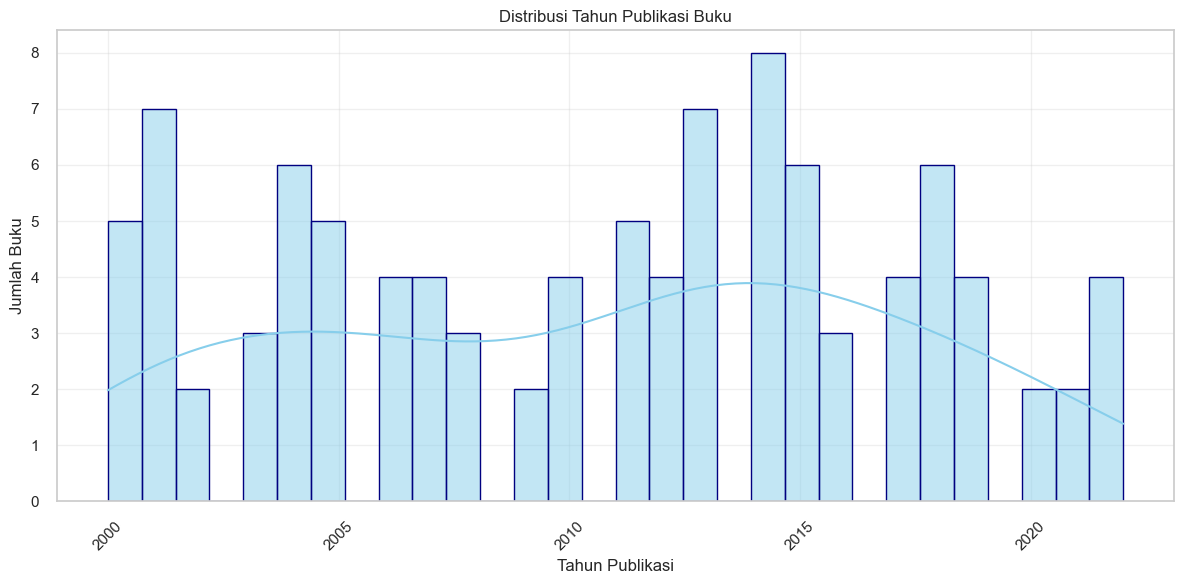

In [69]:
# 1. Distribusi Tahun Publikasi
plt.figure(figsize=(12, 6))
sns.histplot(df['Date'], bins=30, kde=True, color='skyblue', edgecolor='navy')
plt.title('Distribusi Tahun Publikasi Buku')
plt.xlabel('Tahun Publikasi')
plt.ylabel('Jumlah Buku')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

1. Distribusi Tahun Publikasi Buku
(Histogram – Distribusi Tahun Publikasi Buku)
Visualisasi ini menunjukkan persebaran jumlah buku berdasarkan tahun publikasi.

Penjelasan:

Buku dalam dataset tersebar dari sekitar tahun 2000 hingga 2022
Terlihat konsentrasi buku yang cukup tinggi pada rentang 2010–2018
Hal ini menunjukkan bahwa sebagian besar buku terbaik versi New York Times berasal dari era modern
Jumlah buku sebelum tahun 2000 relatif lebih sedikit

Insight utama:
Daftar 100 Best Books didominasi oleh karya-karya kontemporer, menandakan fokus literatur modern yang relevan dengan pembaca saat ini.

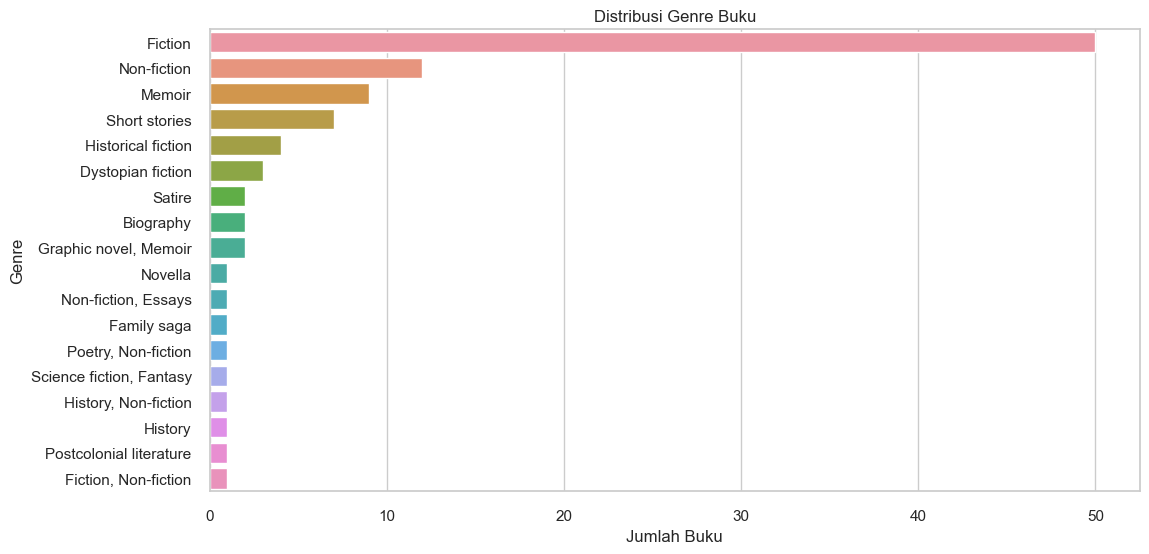

In [60]:
# 2. Top 10 Genre Buku
plt.figure(figsize=(12, 6))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Distribusi Genre Buku')
plt.xlabel('Jumlah Buku')
plt.ylabel('Genre')
plt.show()

2. Distribusi Genre Buku
(Bar Chart – Distribusi Genre Buku)
Grafik ini menampilkan jumlah buku berdasarkan genre.

Penjelasan:

Genre Fiction mendominasi secara signifikan dibanding genre lainnya
Genre Non-fiction berada di posisi kedua
Genre lain seperti Memoir, Short Stories, Historical Fiction, dan Dystopian Fiction memiliki jumlah yang lebih kecil
Beberapa genre bersifat gabungan (Fiction, Non-fiction), menunjukkan fleksibilitas klasifikasi buku

Insight utama:
Fiksi menjadi genre yang paling berpengaruh dan paling sering muncul dalam daftar buku terbaik versi The New York Times.

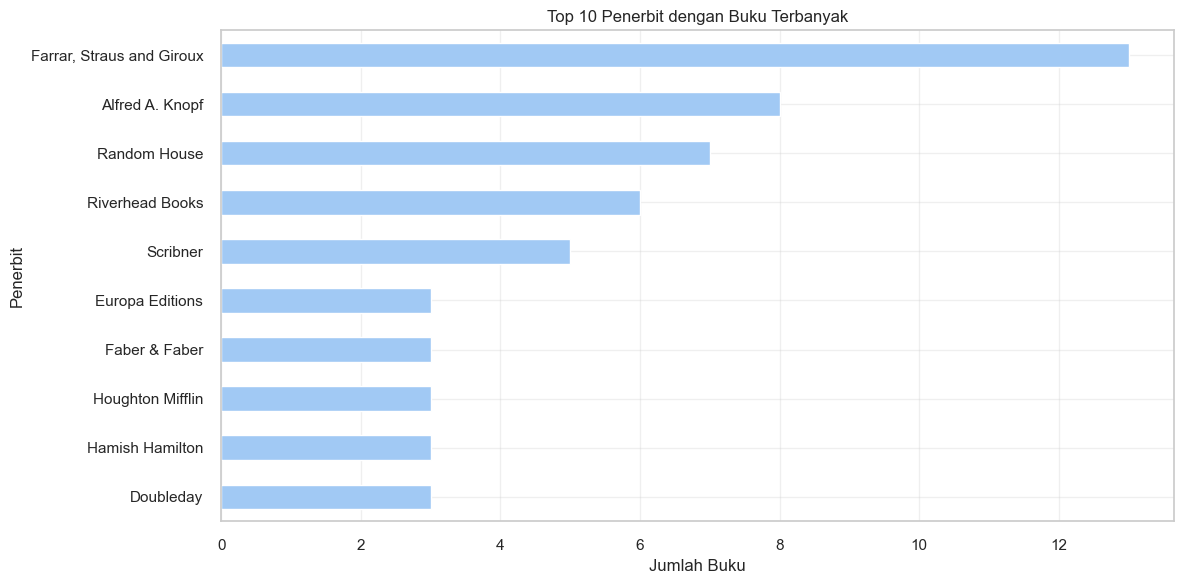

In [61]:
# 3. Top 10 Penerbit
plt.figure(figsize=(12, 6))
df['Publisher'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Penerbit dengan Buku Terbanyak')
plt.xlabel('Jumlah Buku')
plt.ylabel('Penerbit')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

3. Top 10 Penerbit dengan Buku Terbanyak
(Horizontal Bar Chart – Top 10 Penerbit)
Visualisasi ini memperlihatkan 10 penerbit dengan jumlah buku terbanyak dalam dataset.

Penjelasan:

Farrar, Straus and Giroux berada di posisi teratas
Diikuti oleh penerbit besar seperti Alfred A. Knopf, Random House, dan Riverhead Books
Penerbit-penerbit ini dikenal sebagai penerbit literatur berkualitas tinggi

Insight utama:
Daftar buku terbaik cenderung diterbitkan oleh penerbit besar dan bereputasi internasional.

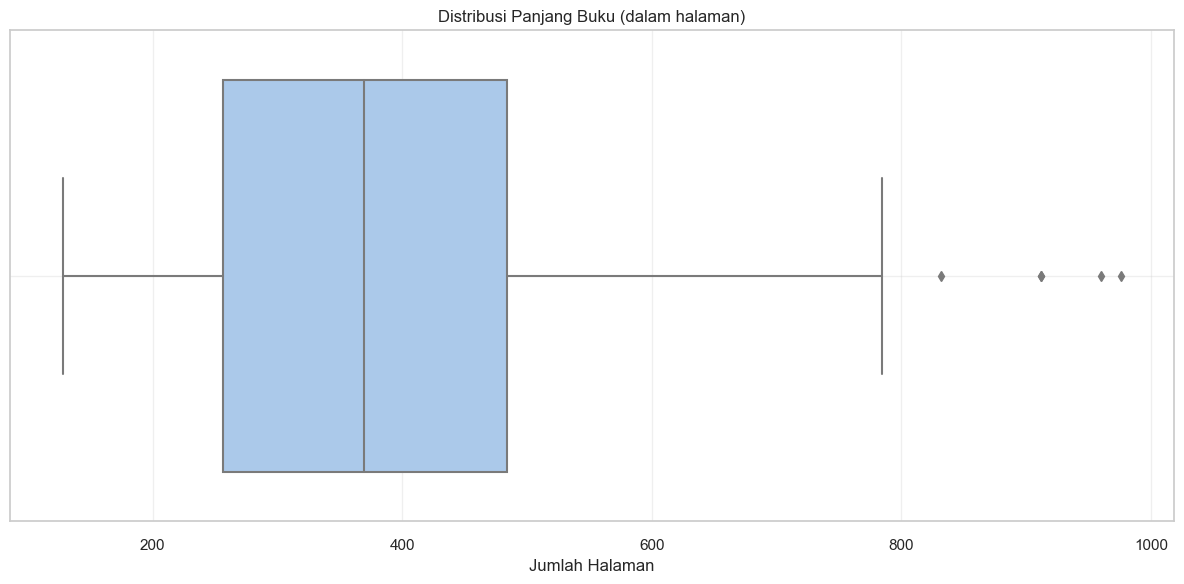

In [62]:
# 4. Distribusi Panjang Buku
plt.figure(figsize=(12, 6))
sns.boxplot(x='Page_Count', data=df)
plt.title('Distribusi Panjang Buku (dalam halaman)')
plt.xlabel('Jumlah Halaman')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

4. Distribusi Panjang Buku (Jumlah Halaman)
(Boxplot – Panjang Buku)
Visualisasi ini menunjukkan persebaran jumlah halaman buku.

Penjelasan:

Mayoritas buku memiliki panjang antara 250–500 halaman
Median jumlah halaman berada di kisaran 350–400 halaman
Terdapat beberapa outlier dengan jumlah halaman sangat besar (di atas 800 halaman)

Insight utama:
Buku terbaik tidak harus sangat panjang, namun beberapa karya epik dengan halaman besar tetap mendapat pengakuan.

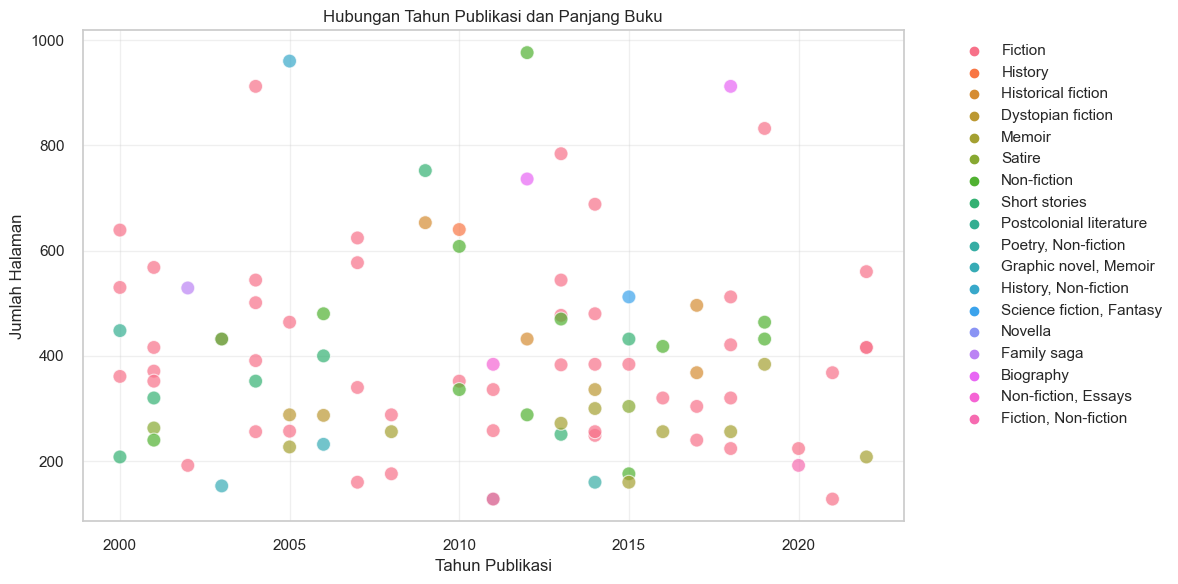

In [63]:
# Hubungan Antara Tahun Publikasi dan Panjang Buku
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Date', y='Page_Count', hue='Genre', alpha=0.7, s=100)
plt.title('Hubungan Tahun Publikasi dan Panjang Buku')
plt.xlabel('Tahun Publikasi')
plt.ylabel('Jumlah Halaman')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

5. Hubungan Tahun Publikasi dan Panjang Buku
(Scatter Plot – Tahun vs Jumlah Halaman)
Grafik ini menunjukkan hubungan antara tahun publikasi dan panjang buku, dengan warna berdasarkan genre.

Penjelasan:

Tidak terlihat korelasi linear yang kuat antara tahun dan jumlah halaman
Buku panjang dan pendek muncul di berbagai tahun
Genre tertentu seperti Biography dan Non-fiction cenderung memiliki jumlah halaman lebih banyak

Insight utama:
Panjang buku tidak dipengaruhi secara langsung oleh tahun publikasi, melainkan lebih dipengaruhi oleh genre

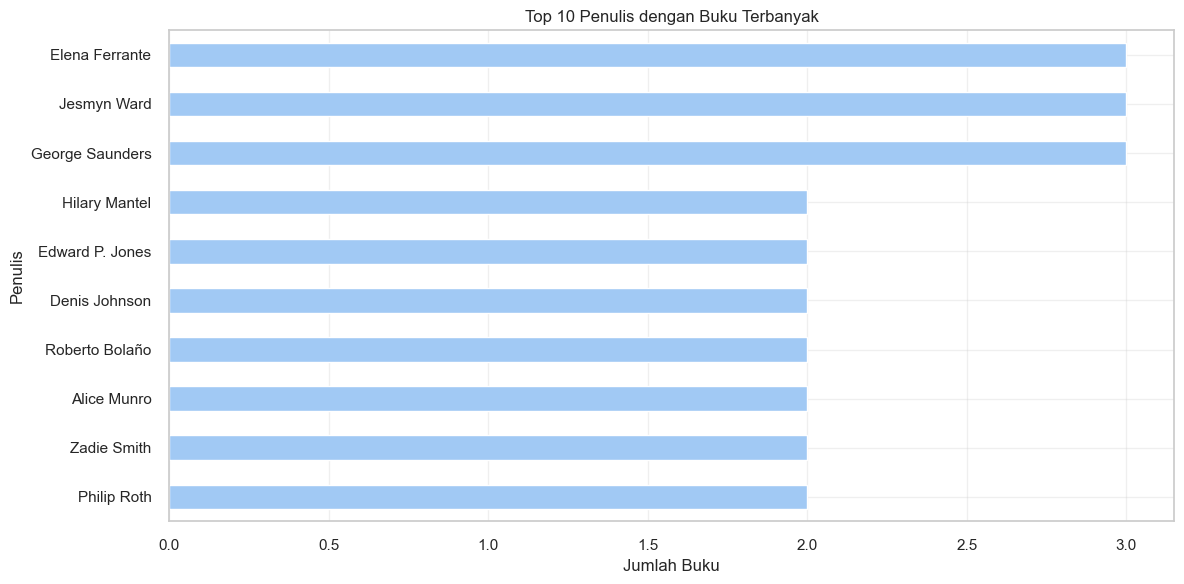

In [64]:
# Top 10 Penulis
plt.figure(figsize=(12, 6))
df['Author'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Penulis dengan Buku Terbanyak')
plt.xlabel('Jumlah Buku')
plt.ylabel('Penulis')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

6. Top 10 Penulis dengan Buku Terbanyak
(Horizontal Bar Chart – Penulis)
Visualisasi ini menunjukkan penulis yang paling sering muncul dalam dataset.

Penjelasan:

Elena Ferrante, Jesmyn Ward, George Saunders berada di posisi teratas
Sebagian besar penulis dalam daftar ini memiliki 2–3 buku
Tidak ada satu penulis yang mendominasi secara ekstrem

Insight utama:
Daftar 100 Best Books bersifat inklusif dan tidak didominasi oleh satu penulis saja.

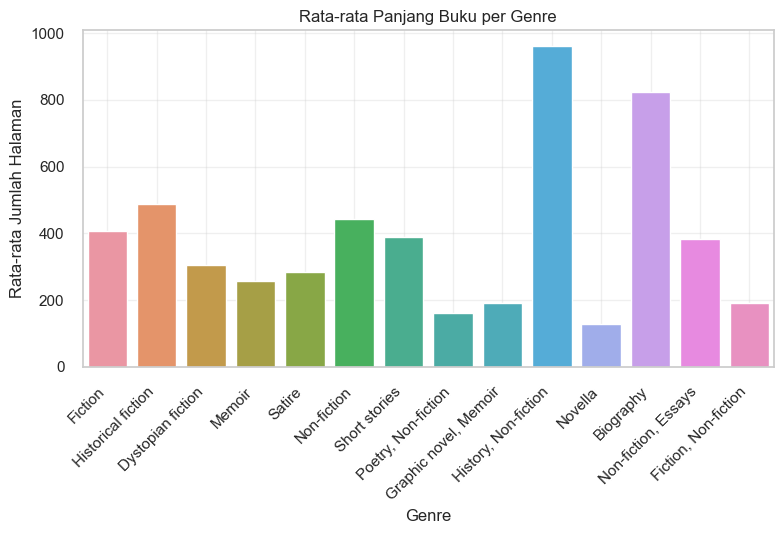

In [65]:
# 7. Rata-rata Panjang Buku per Genre
top_genres = df['Genre'].str.split('/').explode().str.strip().value_counts().head(10).index
genre_length = df[df['Genre'].str.contains('|'.join(top_genres))].copy()
genre_length['Main_Genre'] = genre_length['Genre'].str.split('/').str[0].str.strip()
sns.barplot(data=genre_length, x='Main_Genre', y='Page_Count', estimator='mean', errorbar=None)
plt.title('Rata-rata Panjang Buku per Genre')
plt.xlabel('Genre')
plt.ylabel('Rata-rata Jumlah Halaman')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

7. Rata-rata Panjang Buku per Genre
(Bar Chart – Rata-rata Halaman)
Grafik ini menampilkan rata-rata jumlah halaman berdasarkan genre.

Penjelasan:

Genre History, Non-fiction dan Biography memiliki rata-rata halaman paling tinggi
Genre Novella dan Graphic Novel memiliki panjang yang relatif lebih pendek
Genre Fiction berada di tengah dengan panjang yang seimbang

Insight utama:
Genre non-fiksi cenderung lebih panjang karena bersifat informatif dan mendalam.

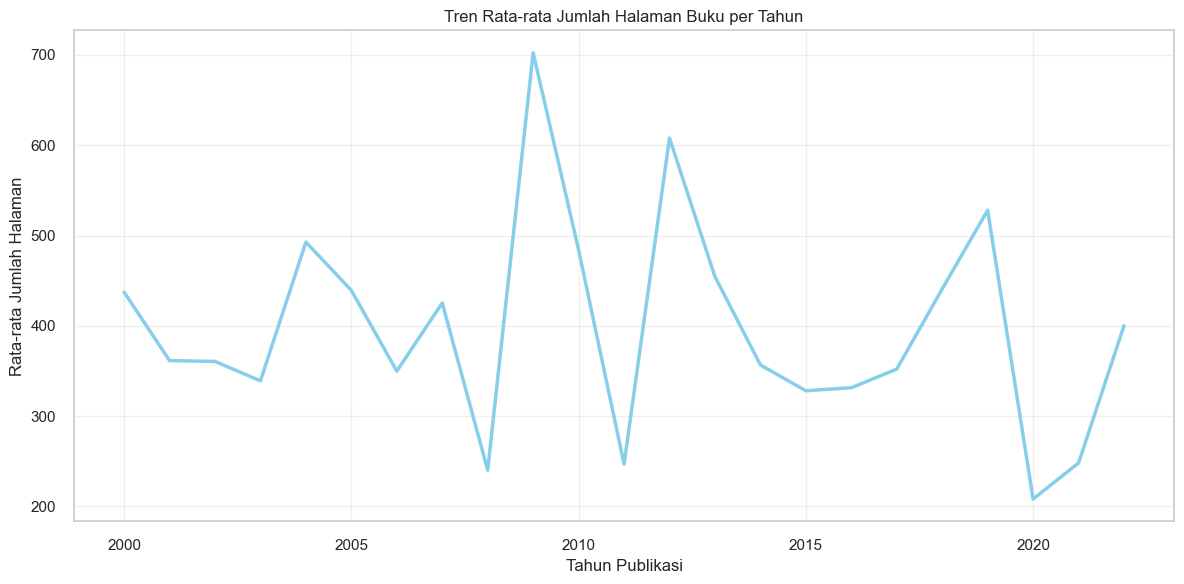

In [72]:
# 8. Tren Rata-rata Jumlah Halaman per Tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Page_Count', estimator='mean', errorbar=None, color='skyblue', linewidth=2.5)
plt.title('Tren Rata-rata Jumlah Halaman Buku per Tahun')
plt.xlabel('Tahun Publikasi')
plt.ylabel('Rata-rata Jumlah Halaman')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

8. Tren Rata-rata Jumlah Halaman Buku per Tahun
(Line Chart – Tren Tahunan)
Visualisasi ini menunjukkan perubahan rata-rata jumlah halaman buku per tahun.

Penjelasan:

Terjadi fluktuasi jumlah halaman dari tahun ke tahun
Beberapa tahun menunjukkan lonjakan signifikan, menandakan terbitnya buku-buku panjang
Tidak ada tren naik atau turun yang konsisten

Insight utama:
Panjang buku terbaik bersifat dinamis dan dipengaruhi oleh karakter karya pada tahun tertentu.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       100 non-null    object
 1   Author      100 non-null    object
 2   Publisher   100 non-null    object
 3   Date        100 non-null    int64 
 4   Genre       100 non-null    object
 5   Page_Count  100 non-null    int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 4.4+ KB


In [12]:
df.head(50)

,Title,Author,Publisher,Date,Genre,Page_Count
0,My Brilliant Friend,Elena Ferrante,Europa Editions,2011,Fiction,336
1,The Warmth of Other Suns,Isabel Wilkerson,Random House,2010,History,640
2,Wolf Hall,Hilary Mantel,Fourth Estate,2009,Historical fiction,653
3,The Known World,Edward P. Jones,Amistad Press,2003,Fiction,432
4,The Corrections,Jonathan Franzen,"Farrar, Straus and Giroux",2001,Fiction,568
5,2666,Roberto Bolaño,"Farrar, Straus and Giroux",2004,Fiction,912
6,The Underground Railroad,Colson Whitehead,Doubleday,2016,Fiction,320
7,Austerlitz,W. G. Sebald,Hamish Hamilton,2001,Fiction,416
8,Never Let Me Go,Kazuo Ishiguro,Faber & Faber,2005,Dystopian fiction,288
9,Gilead,Marilynne Robinson,"Farrar, Straus and Giroux",2004,Fiction,256
